In [1]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 加载模型
model = KeyedVectors.load_word2vec_format('50thousand.txt')

In [5]:

# 获取所有词向量
words = list(model.index_to_key)
word_vectors = np.array([model[word] for word in words])



In [8]:

# 使用TSNE进行降维
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(word_vectors)



In [9]:

# 计算目标词'perovskite'和'HTL'的余弦相似度
target_word_1 = 'perovskite'
target_word_2 = 'HTL'
cosine_similarity_1 = np.dot(word_vectors, model[target_word_1]) / (np.linalg.norm(word_vectors, axis=1) * np.linalg.norm(model[target_word_1]))
cosine_similarity_2 = np.dot(word_vectors, model[target_word_2]) / (np.linalg.norm(word_vectors, axis=1) * np.linalg.norm(model[target_word_2]))


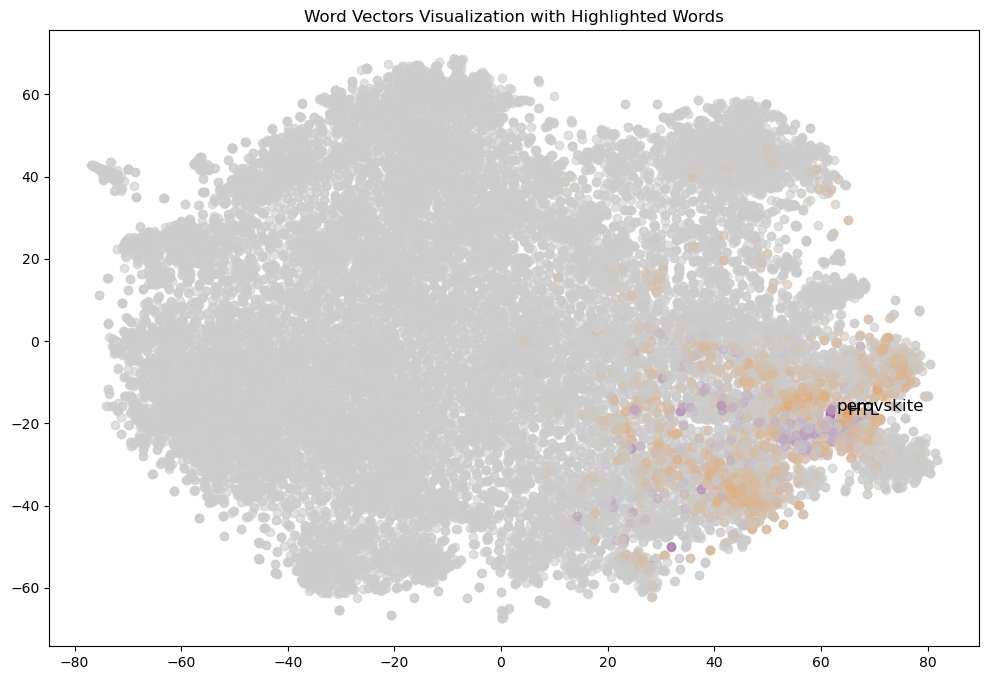

In [10]:
# 可视化
plt.figure(figsize=(12, 8))

# 设置颜色映射
def get_color(similarity, base_color):
    if similarity > 0.5:
        intensity = (similarity - 0.5) * 2  # 将范围[0.5, 1.0]映射到[0, 1]
        return intensity * base_color + (1 - intensity) * np.array([0.8, 0.8, 0.8])
    else:
        return np.array([0.8, 0.8, 0.8])

# 绘制所有词向量点
for i, (word, vec) in enumerate(zip(words, reduced_vectors)):
    color = np.array([0.8, 0.8, 0.8])  # 浅灰色
    if cosine_similarity_1[i] > 0.5:
        color = get_color(cosine_similarity_1[i], np.array([0.5, 0.0, 0.5]))  # 紫色
    elif cosine_similarity_2[i] > 0.5:
        color = get_color(cosine_similarity_2[i], np.array([1.0, 0.5, 0.0]))  # 橙色
    
    plt.scatter(vec[0], vec[1], color=color, alpha=0.6)
    if word == target_word_1 or word == target_word_2:
        plt.annotate(word, xy=(vec[0], vec[1]), xytext=(5, 2), textcoords='offset points', fontsize=12, color='black')

# 输出为png格式
plt.title("Word Vectors Visualization with Highlighted Words")
plt.savefig("word_vectors_visualization.png", format='png')
plt.show()